# Data Driven Science and Engineering
## Chapter 2 - Fourier Transformations
To see explinations of Fourier Transformations, please see the markdown file within this folder

----
importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

----
Example Fourier Series for a continuous Hat Function


$\Biggl\{\begin{align*} 
0 \;for\; x \in [-\pi,-\pi/2 ) \\ 
1+2x/\pi \;for\; x \in [-\pi/2,0) \\
1-2x/\pi \;for\; x\in [0,\pi/2)\\
0 \;for\; x \in [\pi/2,\pi)
\end{align*}$

In [2]:
# define domain
dx = 0.001
L = np.pi
x = np.arange(-1,1,dx) * L
F_x = np.zeros(len(x))
n = int(x.size/4)
# creating function
F_x[0:n] = 0
F_x[n:2*n] = 1 + 2*x[n:2*n]/np.pi
F_x[2*n:3*n] = 1 - 2*x[2*n:3*n]/np.pi
F_x[3*n:]=0

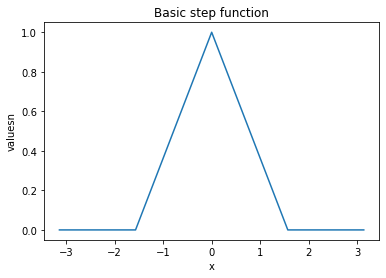

In [3]:
plt.title("Basic step function") 
plt.xlabel("x") 
plt.ylabel("valuesn") 
plt.plot(x,F_x) 
plt.show()

Now doing a fourier transformation on the hat functions

In [ ]:
a_0 = np.sum(F_X)

$\Biggl\{\begin{align*} 
0 \;for\; x \in [0,L/4) \\ 
1 \;for\; x \in [L/4,3L/4) \\
0 \;for\; x\in [3L/4,L)\\
\end{align*}$